In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Singular value decomposition
---


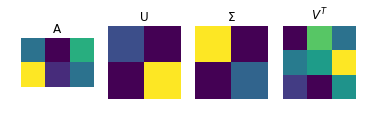

In [12]:

# the matrix
A = [ [3,0,5], [8,1,3] ]

U,S,V = np.linalg.svd(A)

plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V.T)
plt.title('$V^T$')
plt.axis('off')

plt.show()


---
# VIDEO: Spectral theory of matrices
---


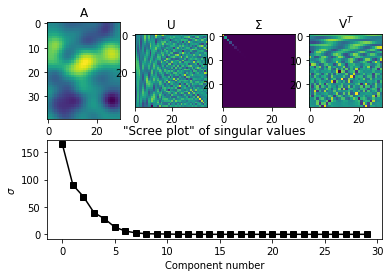

In [79]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD (note that V comes out transposed, which is different from MATLAB behavior)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()


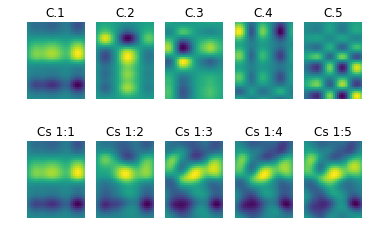

In [84]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:])
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()


---
# VIDEO: SVD for low-rank approximations
---


rank = 5


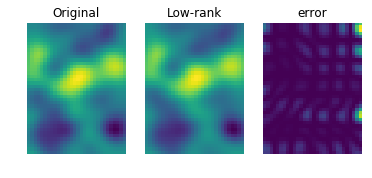

In [107]:

# number of components (singular "layers") to keep
nComps = 5

# reduced vectors
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )

# error map and percent difference from original matrix
errormap = (reconImage-A)**2
pctdiff  = 100*np.linalg.norm(reconImage-A)/np.linalg.norm(A)

# show the results!
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap)
plt.axis('off')
plt.title('error')
plt.show()
   


---
# VIDEO: Convert singular values to percent variance
---


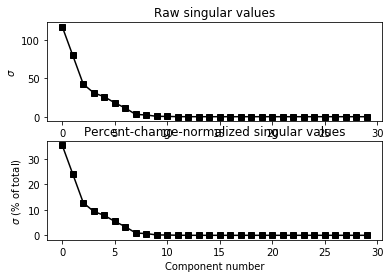

In [122]:

# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD
U,s,V = np.linalg.svd(A)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')
plt.show()


---
# VIDEO: SVD, matrix inverse, and pseudoinverse
---


In [137]:

# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A (note that python produces V^T, hence V.T below is actually V)
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A )

# compute with pinv function
print( np.linalg.pinv(A)@A )


[[  2.00000000e-01   4.00000000e-01   5.55111512e-17]
 [  4.00000000e-01   8.00000000e-01   0.00000000e+00]
 [ -5.55111512e-17  -1.11022302e-16   1.00000000e+00]]
[[  2.00000000e-01   4.00000000e-01  -1.11022302e-16]
 [  4.00000000e-01   8.00000000e-01   0.00000000e+00]
 [ -5.55111512e-17  -1.11022302e-16   1.00000000e+00]]



---
# VIDEO: Condition number of a matrix
---


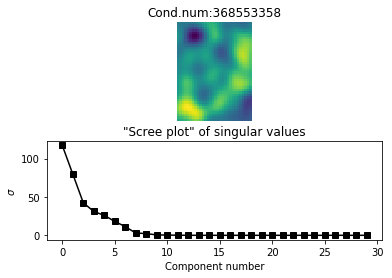

In [142]:

# matrix sizes
m = 40

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')



# SVD
U,S,V = np.linalg.svd(A)

# compute condition number
condnum = s[0]/s[-1]

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num:%d' %condnum)

plt.subplot(212)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

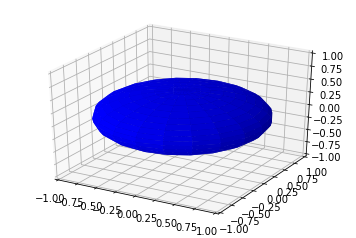

In [176]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()